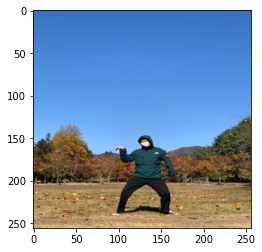

In [1]:
#필요 Library import
import tensorflow as tf
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

#이미지를 256,256 size로 load 합니다.
img = Image.open('sample_data\Image1.jpg').resize((256,256))
plt.imshow(img)

In [10]:
#img 를 rgb 값을 활용하여 숫자 배열로 변형합니다.
#불러들인 배열은 255 로 나누어 스케일을 조정해줍니다.
img_arr = np.array(img)/255.
img_arr = img_arr.reshape((1,)+img_arr.shape)

# 이미지가 R,G,B 3개의 채널을 가지고 있음으로 (h,w,3) 의 배열이 반환됩니다.
print(img_arr.shape) 
print(img_arr[:10,:10,0])

(1, 256, 256, 3)
[[[0.21568627 0.43137255 0.74509804]
  [0.21568627 0.43137255 0.74509804]
  [0.21960784 0.44313725 0.75294118]
  [0.21960784 0.45098039 0.75686275]
  [0.22352941 0.44705882 0.75686275]
  [0.22352941 0.44705882 0.75686275]
  [0.22745098 0.45098039 0.76078431]
  [0.23137255 0.45490196 0.76470588]
  [0.23529412 0.45882353 0.76862745]
  [0.23529412 0.45882353 0.76862745]]]


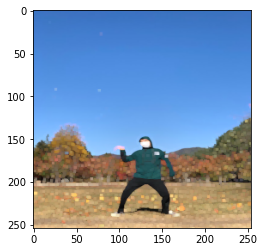

In [21]:
#불러온 이미지를 풀링 층을 통과 시킵니다.
#모든 채널 (R,G,B)에 풀링층이 적용 됩니다.
out_images = tf.nn.max_pool(img_arr, ksize = (3,3), 
                    strides = (1,1), padding = 'VALID')


#3x3 영역내에 가장 뚜렷한(높은 값의) pixel 만 출력하게 됩니다.
new_img = out_images[0].numpy() * 255
plt.imshow(new_img.astype(np.uint8))

In [22]:
g_avg_pool = tf.keras.layers.GlobalAvgPool2D()